In [39]:
import numpy as np
# For plotting purposes
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d # 3 Dimensional plotting
from matplotlib import cm # For some fancy plotting ;-)

# Loss Function

In [40]:

def Cross_Entropy(y_hat, y):
    # There are 2 possibilities for the ground-truth: either 0 or 1
    # Note that np.log() is actually the natural logarithm with e, for its base
    if y == 1:
      return -np.log(y_hat)
    else:
      return -np.log(1 - y_hat)
# This is just the classic sigmoid function, given input z
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def Cross_Entropy(y_hat, y):
    # There are 2 possibilities for the ground-truth: either 0 or 1
    # Note that np.log() is actually the natural logarithm with e, for its base
    if y == 1:
      return -np.log(y_hat)
    else:
      return -np.log(1 - y_hat)
# This is just the classic sigmoid function, given input z
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivative of the Loss Function

In [41]:
def derivative_Cross_Entropy(y_hat, y):
    # Again we account for 2 possibilities of y=0/1
    if y == 1:
      return -1/y_hat
    else:
      return 1 / (1 - y_hat)
# The derivative of sigmoid is quite straight-forward
def derivative_sigmoid(x):
    return x*(1-x)

def derivative_Cross_Entropy(y_hat, y):
    # Again we account for 2 possibilities of y=0/1
    if y == 1:
      return -1/y_hat
    else:
      return 1 / (1 - y_hat)
# The derivative of sigmoid is quite straight-forward
def derivative_sigmoid(x):
    return x*(1-x)

# Data

In [42]:

# Our data
X = np.array([[0, 0], [0, 5], [5, 0], [5, 5]])
# The ground truth (i.e., what AND returns and our perceptron should learn to produce)
Y = np.array([0, 0, 0, 1])

<ipython-input-43-4010c4d41ea6>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


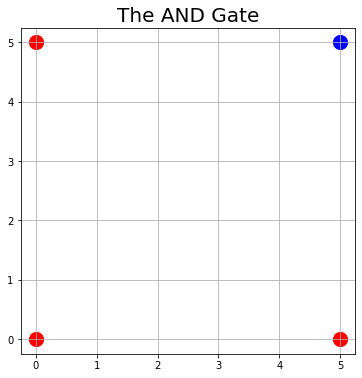

In [43]:
area = 200
fig = plt.figure(figsize=(6, 6))
plt.title('The AND Gate', fontsize=20)
ax = fig.add_subplot(111)
# color red: is class 0 and color blue is class 1.
ax.scatter(0, 0, s=area, c='r', label="Class 0")
ax.scatter(0, 5, s=area, c='r', label="Class 0")
ax.scatter(5, 0, s=area, c='r', label="Class 0")
ax.scatter(5, 5, s=area, c='b', label="Class 1")
plt.grid()
plt.show()

# Network

In [44]:
# Remember we consider this rage to be small, so that during the back-propagation
# Our gradients through the sigmoid unit will stay strong. This is a major concern in
# Deep nets however!
low = -0.01
high = 0.01
# We are using uniform distribution for our random weight generation.
W_2 = np.random.uniform(low=low, high=high, size=(1,))
W_1 = np.random.uniform(low=low, high=high, size=(1,))
W_0 = np.random.uniform(low=low, high=high, size=(1,))

# Training

In [45]:
# Number of our epochs. Every epoch is a complete sweep through our data
Epoch = 2000
# The learning rate. Preferably a small value!
eta = 0.01

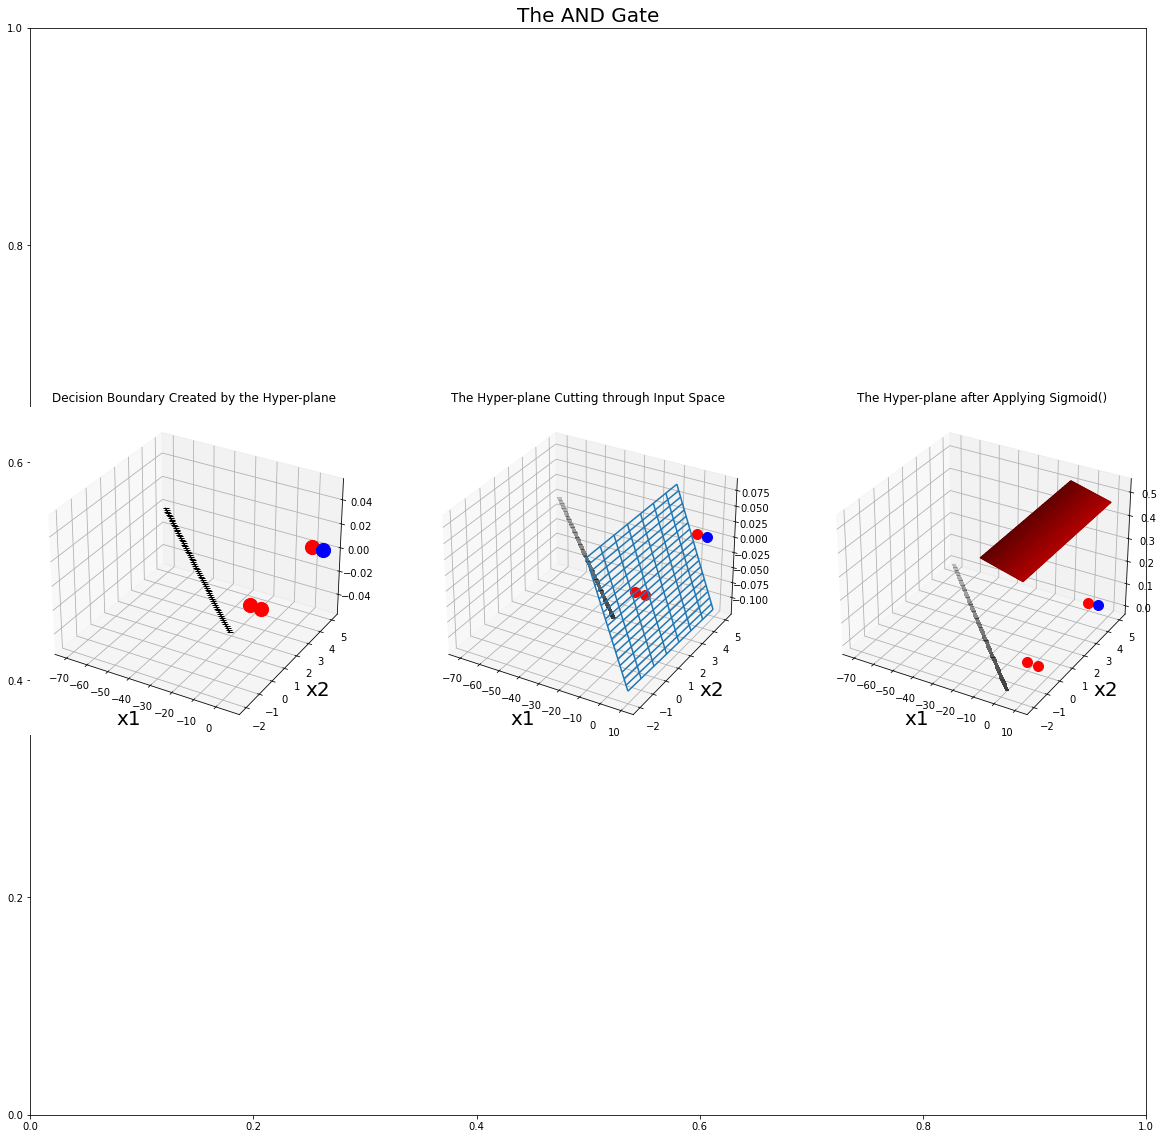

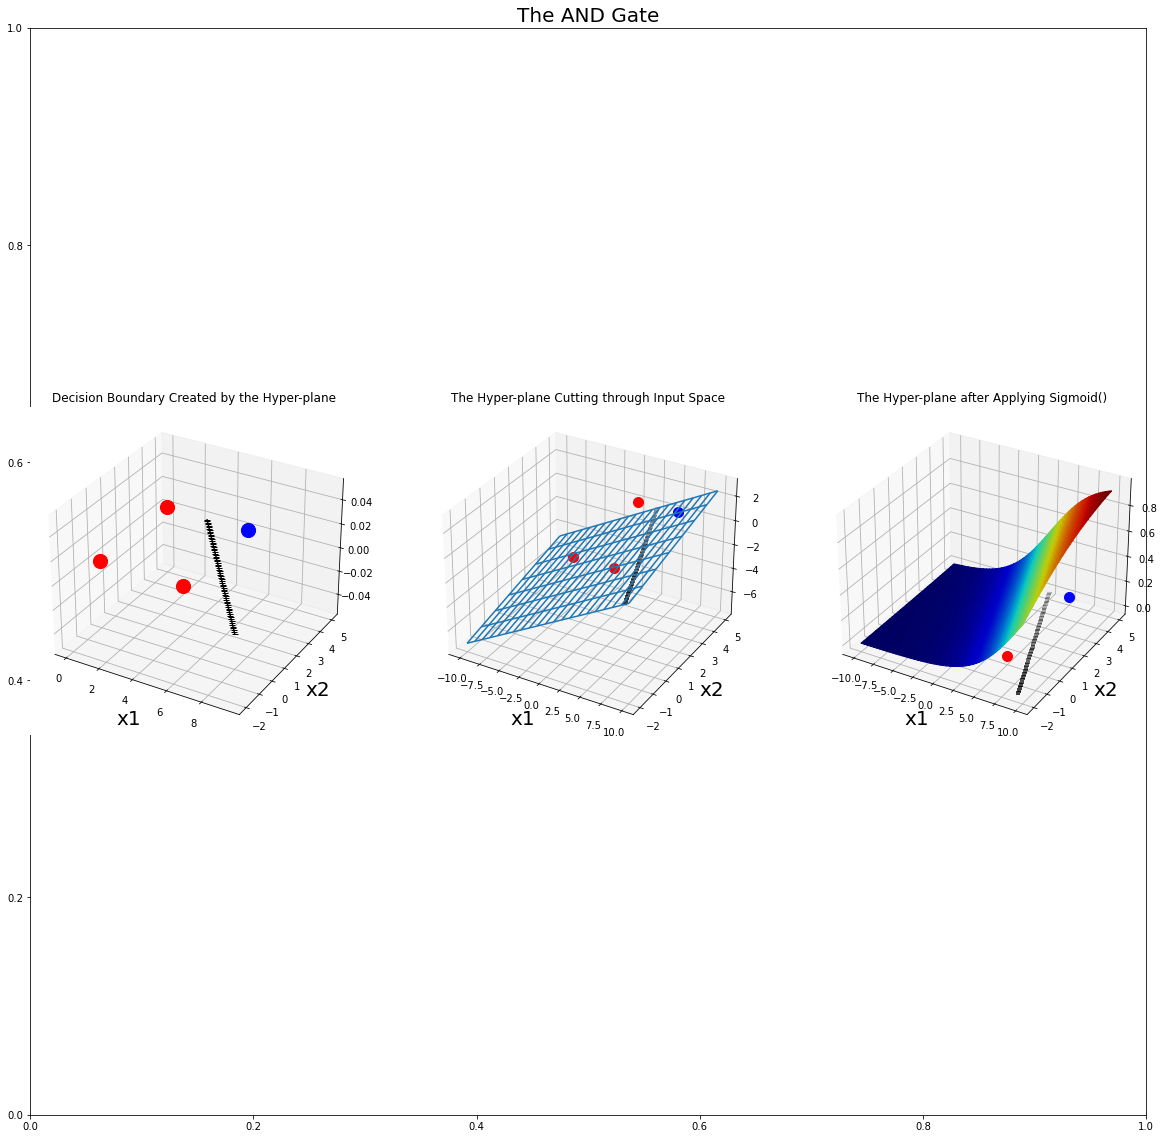

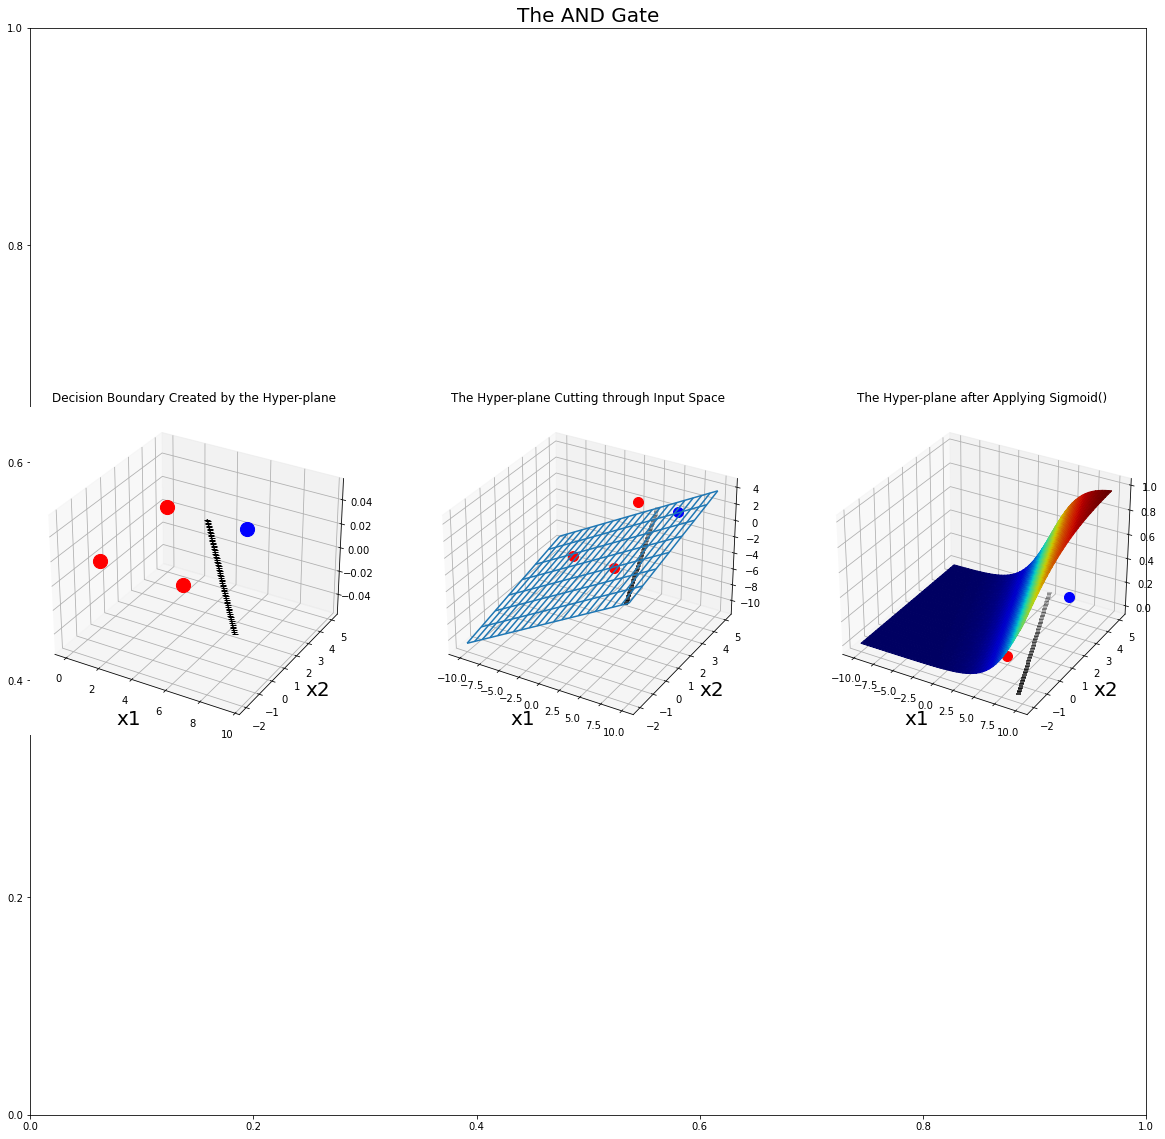

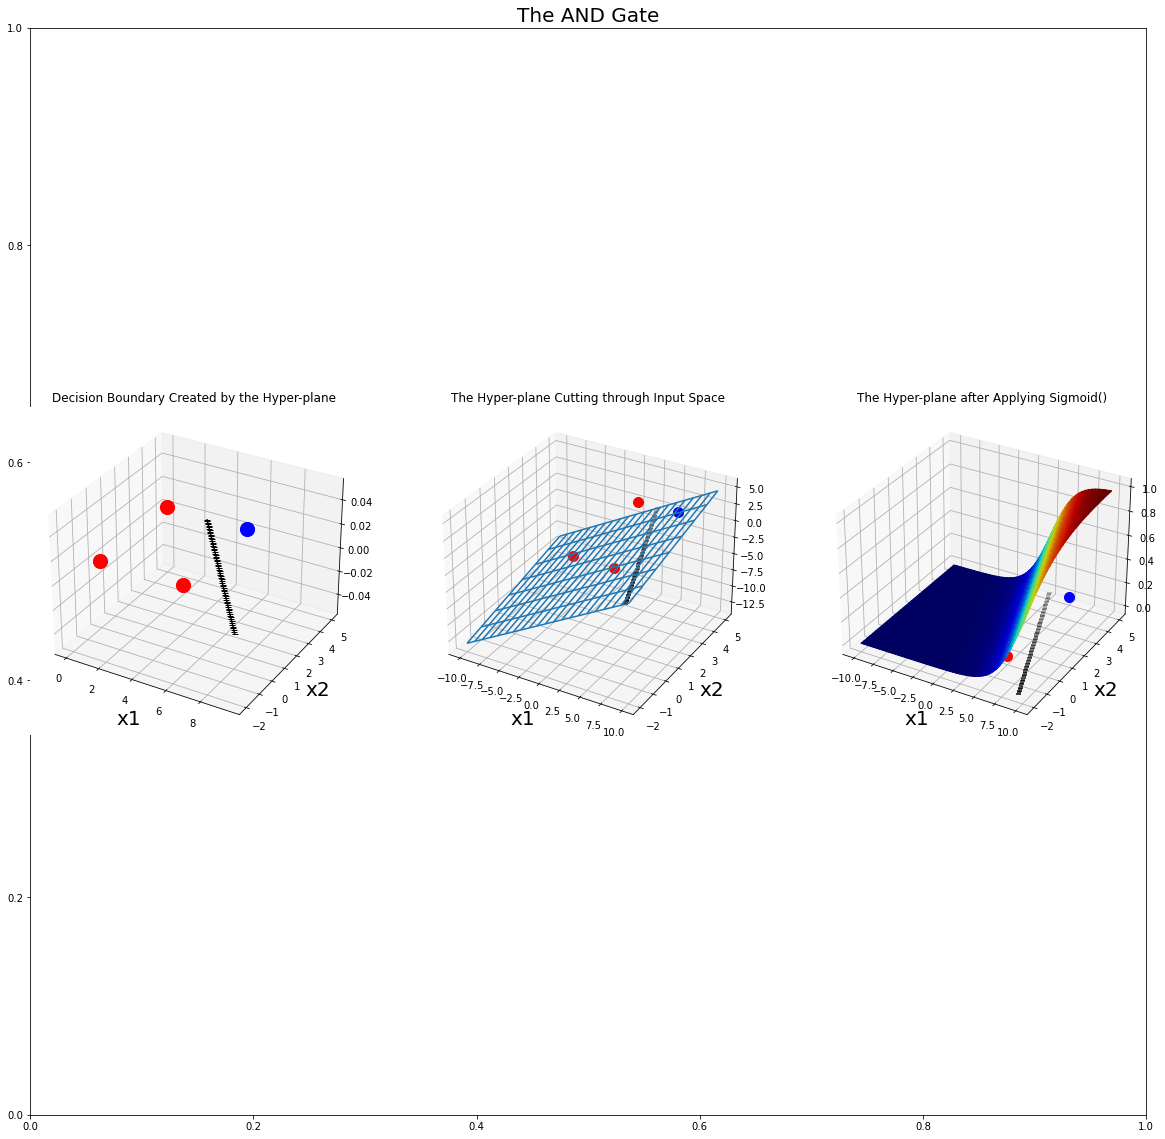

In [46]:
# E will contain the average cross-entropy error per epoch
E = []
# The actual training starts for as many times as Epoch.
for ep in range(Epoch):
    # Shuffle the train_data X and its Labels Y. Almost always a good practice to shuffle in the beginning of the epoch! 
    random_index = np.arange(X.shape[0])
    # Now random_index has the same length as X and Y, and contains a shuffled index list for X. 
    np.random.shuffle(random_index)
    # e will record errors in an epoch. Then will be averaged, and this average value will be added to E.
    # We reset e[], in the beginning of each epoch
    e = []
    # This loop goes through the shuffled training data. random_index makes sure for training data 
    # in X we are grabbing the correct ground truth from Y
    for i in random_index:
        # Grab the ith training data from X
        x = X[i]
        # Compute Z, which is the input to our sigmoidal unit
        Z = W_1* x[0] + W_2* x[1] + W_0
        # Apply sigmoid, to produce an output by the perceptron
        Y_hat = sigmoid(Z)
        # Compute the binary cross-entropy error for this ith data point and add it to e[]
        e.append(Cross_Entropy(Y_hat, Y[i]))
        # Compute the gradients of our error function w.r.t. all 3 learnable parameters (i.e., the weights of our network)
        dEdW_1 = derivative_Cross_Entropy(Y_hat, Y[i])*derivative_sigmoid(Y_hat)*x[0]
        dEdW_2 = derivative_Cross_Entropy(Y_hat, Y[i]) * derivative_sigmoid(Y_hat) * x[1]
        dEdW_0 = derivative_Cross_Entropy(Y_hat, Y[i])*derivative_sigmoid(Y_hat)
        # Update the parameters using the computed gradients. So, we update after each individual data point =&gt; Stochastic gradient descent!
        W_0 = W_0 - eta * dEdW_0
        W_1 = W_1 - eta*dEdW_1
        W_2 = W_2 - eta* dEdW_2
    # Every 500 epochs, we would like to visualise 3 things: 1) The linear 2-Dimensional decision boundary in the input space
    # 2) The actual hyper-plane in the 3-Dimensional space, which by cutting through the input space, 
    # has produced our linear decision boundary, which is the same as our Z (i.e., the input to our sigmoidal unit).
    # Finally, the sigmoid() of this Z, which should squash the hyper-plane between 0 and 1, by definition. NOTE: sigmoid(Z) always 
    # squashes Z into a value in the range [0, 1]
    if ep % 500 == 0:
        # Generate a figure
        fig = plt.figure(figsize=(20, 20))
        plt.title('The AND Gate', fontsize=20)
        # Insert a sub-figure and make sure it is capable of 3-Dimensional rendering
        ax = fig.add_subplot(131, projection='3d')
        # Plot individual data points in this sub-figure
        ax.scatter(0, 0, s=area, c='r', label="Class 0")
        ax.scatter(0, 5, s=area, c='r', label="Class 0")
        ax.scatter(5, 0, s=area, c='r', label="Class 0")
        ax.scatter(5, 5, s=area, c='b', label="Class 1")
        # Give a title to this sub-figure
        plt.title('Decision Boundary Created by the Hyper-plane')
        # The equation of Z = W2X2 + W1X1 + W0 and we know that the linear decision boundary's equation is obtainable by setting Z = 0
        # So, W2X2 + W1X1 + W0 = 0, and by rearranging: x_2 = (-W1/W2) * x1 - (W0/W2) which is a line with the slope (-W1/W2) and the
        # intercept - (W0/W2). Note that the weights are being learned by the perceptron, however, we choose a range of values for x1, 
        # and for each we compute x2. Why a range? because we want to plot a continuous line here, and our x's are just discrete values
        # That can be either 0 or 5 (as shown in our dataset.) 
        x_1 = np.arange(-2, 5, 0.1)
        W_1 * x[0] + W_2 * x[1] + W_0
        x_2 = (-W_1/W_2) * x_1 - (W_0/W_2)
        plt.grid()
        plt.plot(x_2, x_1, '-k', marker='_', label="DB")
        plt.xlabel('x1', fontsize=20)
        plt.ylabel('x2', fontsize=20)
        # Now we add the second sub-figure. This well wisualize the hyper-plane X and the way it cuts through the input space
        ax = fig.add_subplot(132, projection='3d')
        x_0 = np.arange(-10, 10, 0.1)
        # we need a mesh-grid for 3-Dimensional plotting
        X_0, X_1 = np.meshgrid(x_0, x_1)
        # for every combination of points from X_0 and X_1, we generate a value for Z in 3-Dimensions
        Z = X_0*W_1 + X_1*W_2 + W_0
        # We use the wire_frame package so we could see behind this hyper-plane. The stride arguements, 
        # determine the grid-size on this plane. The smaller their values, the finer the grid on the hyper-plane
        ax.plot_wireframe(X_0, X_1, Z, rstride=10, cstride=10)
        # We still want to visualize the linear decision boundary computed in the previous sub-figure
        ax.scatter(x_2, x_1, 0, marker='_', c='k')
        # Again plot our data points as well for this sub-figure
        ax.scatter(0, 0, 0, marker='o', c='r', s=100)
        ax.scatter(0, 5, 0, marker='o', c='r', s=100)
        ax.scatter(5, 0, 0, marker='o', c='r', s=100)
        ax.scatter(5, 5, 0, marker='o', c='b', s=100)
        plt.xlabel('x1', fontsize=20)
        plt.ylabel('x2', fontsize=20)
        plt.title('The Hyper-plane Cutting through Input Space')
        plt.grid()
        # Add the last sub-figure that will show the power of sigmoid(), and highlights how Z gets squashed between 0 and 1
        ax = fig.add_subplot(133, projection='3d')
        # This is really cool! The cm package will color the figure generated by sigmoid(Z), based on the value of sigmoid(Z).
        # Brighter colors are closer to 1 and darker ones are closer to 0! This way you can see how the sigmoid(Z), which is the final
        # Output of our perceptron y_hat, will assign values closer to 1 for our positive examples and values closer to 0 for our negative
        # examples.
        my_col = cm.jet(sigmoid(Z) / np.amax(sigmoid(Z)))
        ax.plot_surface(X_0, X_1, sigmoid(Z), facecolors=my_col)
        # Again we want to see the linear decision boundary produced in the first sub-figure with our actual training examples
        ax.scatter(x_2, x_1, 0, marker='_', c='k')
        ax.scatter(0, 0, 0, marker='o', c='r', s=100)
        ax.scatter(0, 5, 0, marker='o', c='r', s=100)
        ax.scatter(5, 0, 0, marker='o', c='r', s=100)
        ax.scatter(5, 5, 0, marker='o', c='b', s=100)
        plt.title('The Hyper-plane after Applying Sigmoid()')
        plt.xlabel('x1', fontsize=20)
        plt.ylabel('x2', fontsize=20)
        plt.grid()
        plt.show()
    # Now e has the errors for every training example in our training set through out the current epoch. We average that and add it to E[]
    E.append(np.mean(e))

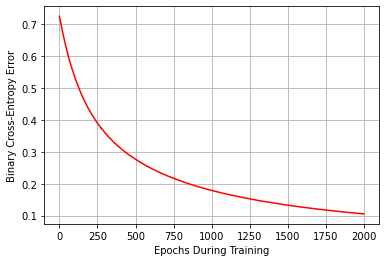

In [47]:
plt.figure()
plt.grid()
plt.xlabel("Epochs During Training")
plt.ylabel("Binary Cross-Entropy Error")
plt.plot(E, c='r')
plt.show()

In [ ]:
# Source:https://www.mldawn.com/train-a-perceptron-to-learn-the-and-gate-from-scratch-in-python/